# Ex Chap_8 Credit Card Fraud Detection via Dimension Reduction

Dataset:[kaggle Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_import = pd.read_csv('../../data_local/creditcard.csv') # large file 150MB

In [3]:
data_import

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
unused = data_import[["Time","Amount"]]
X = data_import.iloc[:,1:-2] # remove the first "time" and last "amount" "class" columns
y = data_import["Class"]
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [5]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=10) # 10 components
X10D = pca.fit_transform(X) # numpy form ugly
X10D = pd.DataFrame(X10D)
X10D

,0,1,2,3,4,5,6,7,8,9
0,1.359822,0.073359,-2.536205,1.378939,0.337034,0.462547,0.238376,-0.103136,0.356352,-0.072365
1,-1.191798,-0.266530,-0.166481,0.445948,-0.058691,-0.080869,-0.076667,-0.082619,-0.251665,0.149167
2,1.358048,1.337828,-1.773930,0.378847,0.513692,1.799712,0.785044,-0.231395,-1.501520,-0.273889
3,0.966397,0.184441,-1.792843,-0.868684,0.014019,1.252098,0.242388,-0.372860,-1.385798,-0.001807
4,1.158251,-0.876802,-1.548584,0.404228,0.405604,0.096022,0.590484,0.263545,0.805877,-0.733205
...,...,...,...,...,...,...,...,...,...,...
284802,11.880743,-10.072756,9.834290,-2.060987,5.367858,-2.611107,-4.928889,-7.297566,1.914902,-4.337013
284803,0.732574,0.053914,-2.035247,-0.736845,-0.863676,1.056957,0.018167,-0.285580,0.599307,0.949245
284804,-1.919720,0.301260,3.249431,-0.553999,-2.631733,3.027733,-0.299962,-0.706781,0.437581,0.506212
284805,0.240465,-0.528952,-0.702206,0.693305,0.373027,0.622476,-0.689459,-0.690501,0.378658,0.460402


In [8]:
# 95 %  explained variance ratio 
pca = PCA()
XD = pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)
d

21

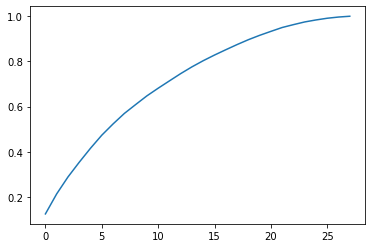

In [9]:
_, ax = plt.subplots(figsize =(6,4))

ax = plt.plot(cumsum)

PCA can be used to compress the amount of information that has to be plotted. 

Let's say that you perform PCA and take in all the components that constitute 95% of the variance in the dataset.You can then take those PCA's and inverse transform them to get something close to the origina data. 

- The 5% that you'll be missing is part of the **reconstruction error**.

In [10]:
pca = PCA(n_components=10)  # 10 components
X10D = pca.fit_transform(X)  # numpy form ugly
X10D = pd.DataFrame(X10D)
X10D_inverse = pca.inverse_transform(X10D)
X10D_inverse = pd.DataFrame(X10D_inverse)
X10D_inverse

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-1.359486,-0.072361,2.536487,1.376630,-0.342043,0.460162,0.241795,0.109701,0.350170,0.127174,...,0.002046,0.000026,0.000659,-0.001163,-0.000177,-0.000824,0.000186,-0.000020,-0.000022,6.445427e-07
1,1.191638,0.265767,0.166680,0.449802,0.063205,-0.079908,-0.080926,0.076098,-0.240666,-0.210319,...,-0.002588,-0.000176,0.000386,0.000393,-0.000020,-0.000472,-0.000182,-0.000043,0.000015,1.401484e-06
2,-1.359828,-1.339455,1.758479,0.389430,-0.500510,1.816901,0.784492,0.212384,-1.468576,0.055482,...,0.012354,0.001225,-0.006241,0.001695,-0.000241,-0.001596,-0.000262,-0.000066,0.000091,8.657168e-07
3,-0.966398,-0.185071,1.790198,-0.859607,-0.010384,1.253666,0.235177,0.376166,-1.382704,-0.075177,...,0.011018,0.001078,-0.005156,0.001149,0.000027,-0.001234,-0.000311,-0.000032,0.000084,4.708783e-07
4,-1.157835,0.878090,1.549666,0.401150,-0.410594,0.093006,0.594773,-0.260558,0.806800,0.782140,...,0.012087,0.000803,-0.001524,-0.002056,0.000293,0.000883,0.000656,0.000117,-0.000049,-4.236293e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881522,10.072408,-9.840431,-2.063179,-5.365593,-2.601974,-4.919395,7.299897,1.926235,4.312548,...,0.111672,0.011420,-0.055696,0.015156,0.003296,0.006468,0.003832,0.001162,-0.000083,-3.310553e-05
284803,-0.733894,-0.055166,2.026324,-0.729731,0.873705,1.073491,0.016502,0.266043,0.619060,-1.088887,...,-0.027021,-0.002471,0.009985,-0.001069,-0.001331,-0.001385,-0.000360,-0.000193,-0.000034,7.451079e-06
284804,1.919431,-0.300537,-3.254660,-0.558068,2.626663,3.032525,-0.295130,0.706344,0.439390,-0.507527,...,-0.020760,-0.001749,0.004830,0.001644,-0.002202,-0.002497,-0.000145,-0.000236,-0.000025,8.320544e-06
284805,-0.238723,0.531296,0.711772,0.680853,-0.389168,0.607580,-0.677782,0.728385,0.329179,-0.224353,...,-0.004951,-0.000329,0.000159,0.001105,-0.000600,-0.001078,0.000017,-0.000051,-0.000019,2.214867e-06


In [11]:
X10D # compare

,0,1,2,3,4,5,6,7,8,9
0,1.359486,0.072353,-2.536522,1.376592,0.341950,0.460169,0.241762,-0.109756,0.351660,-0.122986
1,-1.191638,-0.265768,-0.166690,0.449793,-0.063227,-0.079906,-0.080928,-0.076178,-0.243284,0.207295
2,1.359830,1.339454,-1.758508,0.389394,0.500443,1.816976,0.784341,-0.211743,-1.467954,-0.074312
3,0.966401,0.185069,-1.790192,-0.859654,0.010371,1.253679,0.235039,-0.375652,-1.383795,0.057207
4,1.157838,-0.878094,-1.549653,0.401165,0.410542,0.093042,0.594767,0.260828,0.816484,-0.772175
...,...,...,...,...,...,...,...,...,...,...
284802,11.881546,-10.072334,9.840751,-2.062326,5.365158,-2.601154,-4.920800,-7.296550,1.975684,-4.298692
284803,0.733890,0.055154,-2.026380,-0.729910,-0.873589,1.073294,0.016571,-0.267251,0.605554,1.097049
284804,-1.919436,0.300539,3.254623,-0.558275,-2.626484,3.032630,-0.295317,-0.706487,0.433171,0.513650
284805,0.238723,-0.531297,-0.711807,0.680830,0.389139,0.607568,-0.677877,-0.728616,0.326106,0.227953


If you have a lot of dimensions in your PCA then you might want to take a stochastic approach where the computer will try and estimate your PCAs instead of calculating them. 

You can do thisby setting the `svd_ solver` hyperparameter of the `PCA` clags to `randomized`. By default, this hyperparameter is set to `auto` which means that skLearn will run the full PCA unless the amountof dimensions is too high. You can force it to run the full PCA by setting the `svd_ solver` hyperparameter to `full`.

PCAs work only if the whole training dataset fits into memory. Luckily you can run the PCAincrementally using the `Incremental PCA` class.

More work:

1. imbalanced data

2. confusion matrix

In [12]:
### Compare KernelPCA with LogisticRegression

# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import KernelPCA

In [13]:
# clf = Pipeline([
#     ("kpca",KernelPCA(n_components=2)),
#     ("log_reg",LogisticRegression())
# ])

# param_grid = [{
#     "kpca__gamma":np.linspace(0.03,0.05,10),
#     "kpca__kernel":["rbf","sigmoid"]
# }]

In [14]:
# grid_search = GridSearchCV(clf, param_grid, cv=3)
# grid_search.fit(X,y) ## >6min

In [15]:
# print(grid_search.best_params_)